![miad4.png](Archivos/miad4.png)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

- David Moreno Código andes: 201728270
- Manuel Código andes: 201713626

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este ejercicio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para un *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

## Fase 1: obtener e inspeccionar archivos

Ahora para la columna FAMI_ESTRATOVIVIENDA vamos a extraer el número del string que contiene para solo quedarnos con el número del estrato


En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

In [1]:
#importar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

#Leer los datos del icfes
d_icfes=pd.read_csv('Resultados__nicos_Saber_11.csv')

d_icfes.head

<bound method NDFrame.head of          PERIODO ESTU_TIPODOCUMENTO  ESTU_CONSECUTIVO COLE_AREA_UBICACION  \
0          20181                 CC  SB11201810028234              URBANO   
1          20181                 CC  SB11201810028234              URBANO   
2          20181                 CC  SB11201810047396              URBANO   
3          20181                 TI  SB11201810016997              URBANO   
4          20181                 TI  SB11201810016997              URBANO   
...          ...                ...               ...                 ...   
2258328    20224                 TI  SB11202240161109              URBANO   
2258329    20224                 TI  SB11202240249638              URBANO   
2258330    20224                 CC  SB11202240551456              URBANO   
2258331    20224                 TI  SB11202240534553              URBANO   
2258332    20224                 TI  SB11202240014003              URBANO   

        COLE_BILINGUE COLE_CALENDARIO      CO

In [2]:
d_icfes

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,20181,CC,SB11201810028234,URBANO,N,B,ACADÉMICO,3.760010e+11,3.760010e+11,76.0,...,Si,Si,Si,A1,52.0,34,32,41,44,194
1,20181,CC,SB11201810028234,URBANO,N,B,ACADÉMICO,3.760010e+11,3.760010e+11,76.0,...,Si,Si,Si,A1,52.0,34,32,41,44,194
2,20181,CC,SB11201810047396,URBANO,N,A,NaN,3.730010e+11,3.730010e+11,73.0,...,Si,Si,Si,A-,47.0,47,46,52,58,252
3,20181,TI,SB11201810016997,URBANO,S,B,ACADÉMICO,3.118480e+11,3.118480e+11,11.0,...,Si,Si,Si,B+,87.0,79,74,77,71,381
4,20181,TI,SB11201810016997,URBANO,S,B,ACADÉMICO,3.118480e+11,3.118480e+11,11.0,...,Si,Si,Si,B+,87.0,79,74,77,71,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258328,20224,TI,SB11202240161109,URBANO,N,A,ACADÉMICO,1.761090e+11,1.761090e+11,76.0,...,Si,Si,Si,A-,33.0,46,29,49,36,197
2258329,20224,TI,SB11202240249638,URBANO,N,A,TÉCNICO,1.682760e+11,1.682760e+11,68.0,...,Si,Si,Si,A1,51.0,64,52,60,58,290
2258330,20224,CC,SB11202240551456,URBANO,N,A,ACADÉMICO,1.052120e+11,1.052120e+11,5.0,...,No,Si,Si,A-,28.0,38,40,38,47,199
2258331,20224,TI,SB11202240534553,URBANO,N,A,TÉCNICO/ACADÉMICO,3.410130e+11,3.410130e+11,41.0,...,Si,Si,Si,A1,52.0,52,40,51,49,242


Nuestros datos tienen 2 millones 250 mil filas por 51 columnas, para esto vamos a continuar a la selección de variables, las cuales vamos a limpirar y a hacer un análisis de correlaciones para hacer un incremento de dimensionalidad para que los resultados puedan tener una mayor interpretación

## Periodos de los Datos


Para el siguiente análisis de datos, se va a tomar los suguientes peridos

In [3]:
d_icfes['PERIODO'].value_counts()


PERIODO
20194    1096524
20224    1065888
20181      32348
20221      20049
20211      15528
20201      15435
20191      12561
Name: count, dtype: int64

Vemos que nuestros datos están un poco desbalanceados en categorias, Luego para no seguir con la ley de los pequeños números, donde tan poco datos van a representar un año. Vamos a tomar solo los peridos 20194 y 20224 para nuestro respectivo análisis, para esto filtramos nuesro dataframe de la siguiente forma:

In [4]:
d_icfes=d_icfes[(d_icfes['PERIODO']==20194) | (d_icfes['PERIODO']==20224)]
d_icfes

,PERIODO,ESTU_TIPODOCUMENTO,ESTU_CONSECUTIVO,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,...,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
44909,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71.0,66,70,65,69,339
44910,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,1.410160e+11,2.410160e+11,41.0,...,Si,Si,Si,B1,71.0,66,70,65,69,339
44911,20194,TI,SB11201940562856,URBANO,N,A,TÉCNICO/ACADÉMICO,1.413960e+11,1.413960e+11,41.0,...,No,No,No,A-,46.0,43,31,40,43,199
44912,20194,TI,SB11201940562856,URBANO,N,A,TÉCNICO/ACADÉMICO,1.413960e+11,1.413960e+11,41.0,...,No,No,No,A-,46.0,43,31,40,43,199
44913,20194,TI,SB11201940226736,URBANO,N,A,TÉCNICO/ACADÉMICO,1.680010e+11,1.680010e+11,68.0,...,Si,Si,Si,A2,61.0,64,49,59,63,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258328,20224,TI,SB11202240161109,URBANO,N,A,ACADÉMICO,1.761090e+11,1.761090e+11,76.0,...,Si,Si,Si,A-,33.0,46,29,49,36,197
2258329,20224,TI,SB11202240249638,URBANO,N,A,TÉCNICO,1.682760e+11,1.682760e+11,68.0,...,Si,Si,Si,A1,51.0,64,52,60,58,290
2258330,20224,CC,SB11202240551456,URBANO,N,A,ACADÉMICO,1.052120e+11,1.052120e+11,5.0,...,No,Si,Si,A-,28.0,38,40,38,47,199
2258331,20224,TI,SB11202240534553,URBANO,N,A,TÉCNICO/ACADÉMICO,3.410130e+11,3.410130e+11,41.0,...,Si,Si,Si,A1,52.0,52,40,51,49,242


Al final nuestros datos quedan con 2162412 rows × 51 columns

## Selección de Variables para Análisis

Para nuestro análisis, hemos seleccionado un conjunto específico de variables que consideramos cruciales para abordar nuestro problema. Estas variables proporcionarán información valiosa para nuestro análisis y están relacionadas con diferentes aspectos del desempeño educativo de los estudiantes en las pruebas ICFES. A continuación, se describen detalladamente las variables seleccionadas:

1. **PERIODO:** Este campo contiene información sobre el año y el semestre en que se realizó la prueba.

2. **COLE_AREA_UBICACION:** Esta variable clasifica la ubicación de la institución educativa como urbana o rural, lo que puede ofrecer indicaciones sobre el estrato sociodemográfico y posiblemente influir en la calidad de la educación del estudiante.

3. **COLE_BILINGUE:** Aunque presenta algunos valores ausentes (NaN), evaluaremos si conservamos esta columna o si eliminamos las filas con valores faltantes.

4. **Cole_Calendario:** Indica si la institución educativa sigue el Calendario A o el Calendario B. La elección del Calendario B puede sugerir la prestigiosidad de la institución.

5. **COLE_DEPTO_UBICACION:** Representa el departamento de la sede, lo cual puede proporcionar información socio-demográfica relevante para nuestro análisis. Podemos visualizar la distribución geográfica utilizando mapas de calor.

6. **COLE_MCPIO_UBICACION:** Indica el municipio de los estudiantes.

7. **ESTU_DEPTO_PRESENTACION:** Muestra el departamento en el que los estudiantes presentaron el examen.

8. **ESTU_DEPTO_RESIDE:** Indica el departamento de residencia de los estudiantes.

9. **ESTU_FECHANACIMIENTO:** Nos permite crear una columna con las edades de los estudiantes, lo que facilitará el análisis del desempeño en función de diferentes rangos de edad (por ejemplo, 16-17, 17-18, etc.).

10. **ESTU_GENERO:** Género del estudiante.

11. **ESTU_MCPIO_RESIDE:** Municipio de residencia del estudiante.

12. **FAMI_CUARTOSHOGAR:** Número de cuartos en el hogar del estudiante.

13. **FAMI_EDUCACIONMADRE:** Nivel de estudios de la madre.

14. **FAMI_EDUCACIONPADRE:** Nivel de estudios del padre.

15. **FAMI_ESTRATOVIVIENDA:** Estrato socioeconómico del estudiante.

16. **FAMI_PERSONASHOGAR:** Número de personas con las que vive el estudiante.

17. **FAMI_TIENEAUTOMOVIL:** Indica si la familia tiene automóvil.

18. **FAMI_TIENECOMPUTADOR:** Indica si la familia tiene computador.

19. **FAMI_TIENEINTERNET:** Indica si la familia tiene acceso a internet.

20. **FAMI_TIENELAVADORA:** Indica si la familia tiene lavadora.

21. **PUNT_INGLES:** Puntuación en la prueba de Inglés.

22. **PUNT_MATEMATICAS:** Puntuación en la prueba de Matemáticas.

23. **PUNT_SOCIALES_CIUDADANAS:** Puntuación en la prueba de Sociales y Ciudadanas.

24. **PUNT_C_NATURALES:** Puntuación en la prueba de Ciencias Naturales.

25. **PUNT_LECTURA_CRITICA:** Puntuación en la prueba de Lectura Crítica.

26. **PUNT_GLOBAL:** Puntuación global en todas las pruebas.

Estas variables fueron seleccionadas cuidadosamente debido a su relevancia potencial en nuestro análisis. La inclusión de información geográfica, demográfica y socioeconómica nos permitirá explorar diversas facetas que podrían influir en el rendimiento educativo de los estudiantes.




In [5]:
columnas = [
    "PERIODO",
    "COLE_BILINGUE",
    "COLE_CALENDARIO",
    "COLE_DEPTO_UBICACION",
    "COLE_MCPIO_UBICACION",
    "ESTU_DEPTO_PRESENTACION",
    "ESTU_DEPTO_RESIDE",
    "ESTU_FECHANACIMIENTO",
    "ESTU_GENERO",
    "ESTU_MCPIO_RESIDE",
    "FAMI_CUARTOSHOGAR",
    "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_PERSONASHOGAR",
    "FAMI_TIENEAUTOMOVIL",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENELAVADORA",
    "PUNT_INGLES",
    "PUNT_MATEMATICAS",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_C_NATURALES",
    "PUNT_LECTURA_CRITICA",
    "PUNT_GLOBAL"
]
#Elegimos solo las columnas que nos interesan

d_icfes=d_icfes[columnas]

In [6]:
d_icfes.dtypes

PERIODO                       int64
COLE_BILINGUE                object
COLE_CALENDARIO              object
COLE_DEPTO_UBICACION         object
COLE_MCPIO_UBICACION         object
ESTU_DEPTO_PRESENTACION      object
ESTU_DEPTO_RESIDE            object
ESTU_FECHANACIMIENTO         object
ESTU_GENERO                  object
ESTU_MCPIO_RESIDE            object
FAMI_CUARTOSHOGAR            object
FAMI_EDUCACIONMADRE          object
FAMI_EDUCACIONPADRE          object
FAMI_ESTRATOVIVIENDA         object
FAMI_PERSONASHOGAR           object
FAMI_TIENEAUTOMOVIL          object
FAMI_TIENECOMPUTADOR         object
FAMI_TIENEINTERNET           object
FAMI_TIENELAVADORA           object
PUNT_INGLES                 float64
PUNT_MATEMATICAS              int64
PUNT_SOCIALES_CIUDADANAS      int64
PUNT_C_NATURALES              int64
PUNT_LECTURA_CRITICA          int64
PUNT_GLOBAL                   int64
dtype: object

Notamos que tenemos variables númericas, como los puntajes, y el periodo, que sabemos que no es un número sino una categoria. Para esto vamos a hacer una limpieza de los datos, vamos a analizar los na por columnas y vemos como los limpiamos. Para esto vamos a hacer una gráfica de Nan por cada columna.

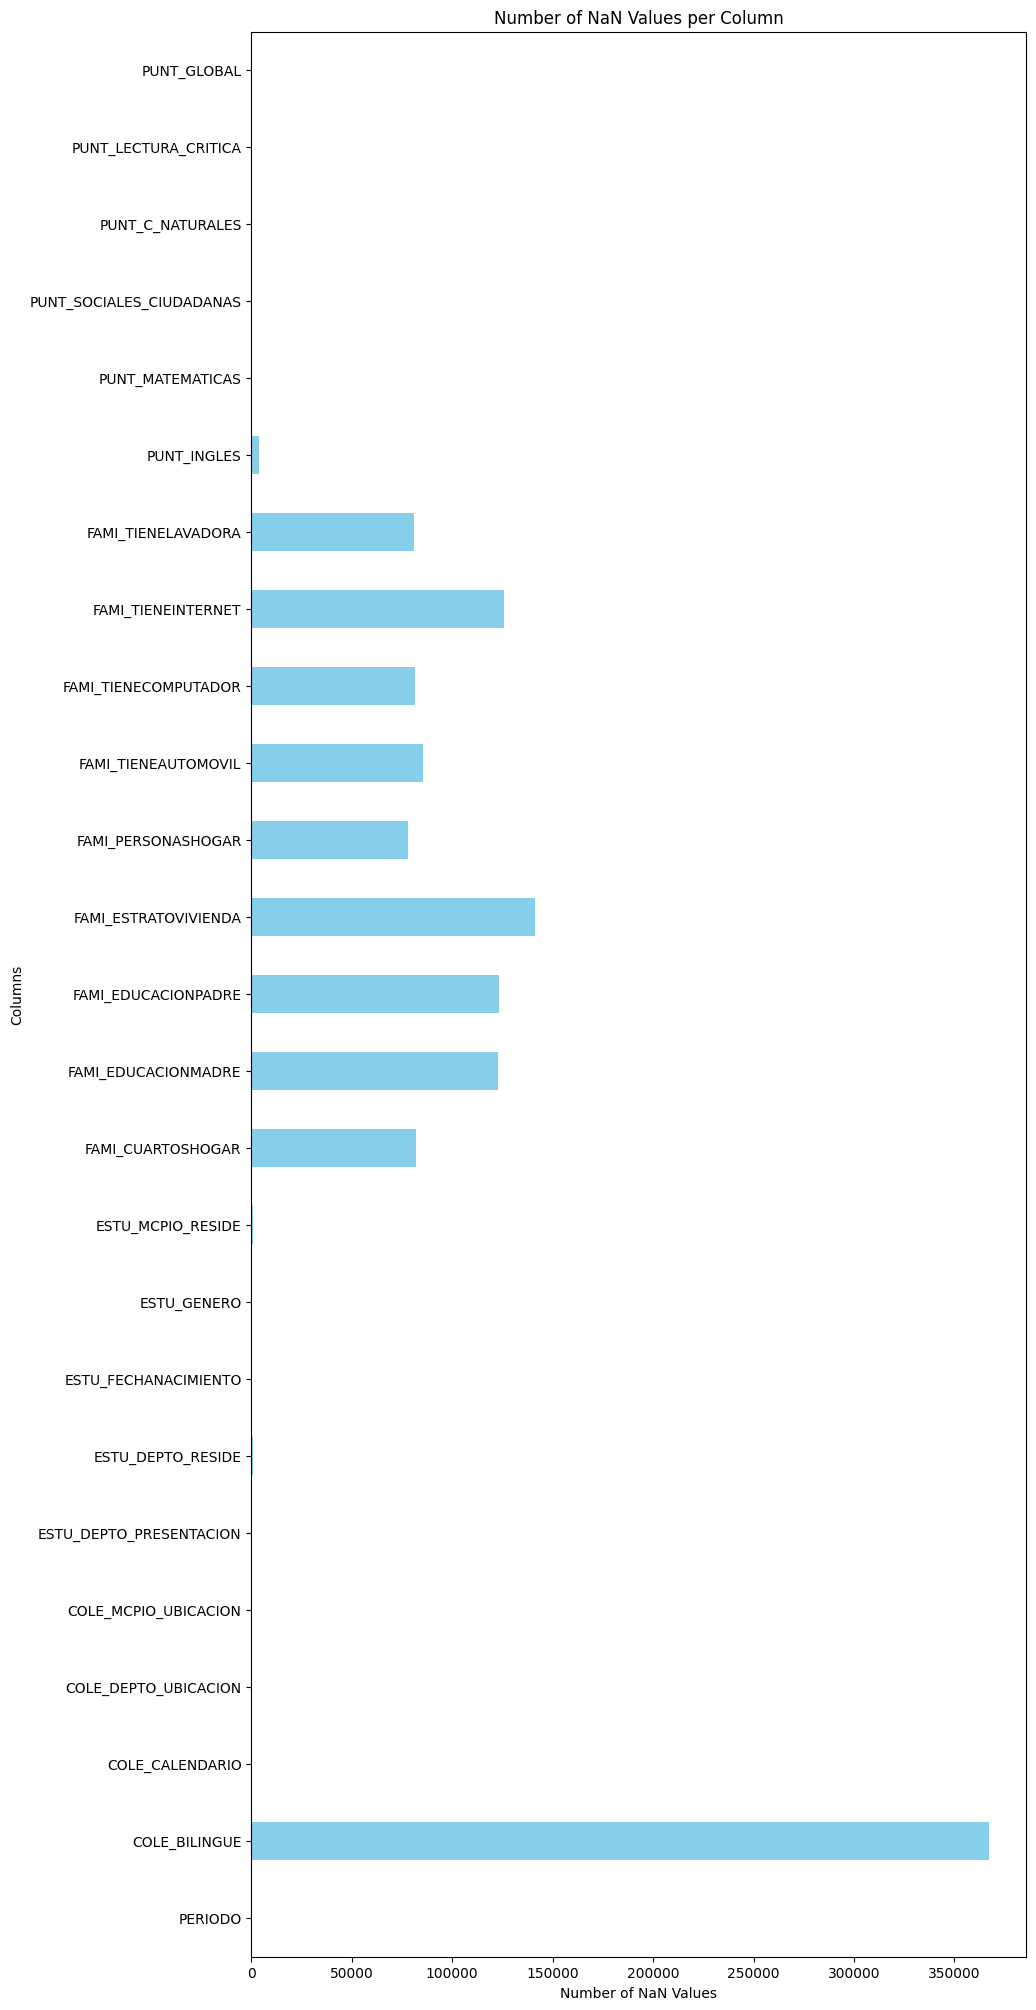

In [7]:
na_counts = d_icfes.isna().sum()

# Plot the number of NaN values per column
fig, ax = plt.subplots(figsize=(10, len(na_counts)))
na_counts.plot(kind='barh', color='skyblue', ax=ax)

# Customize the plot
ax.set_title('Number of NaN Values per Column')
ax.set_xlabel('Number of NaN Values')
ax.set_ylabel('Columns')

plt.show()

En está gráfica vemos algo interesante: la variables Categoricas que comienzan con FAMI tienen en promedio más de 100.00 datos en NA, para esto vamos a limpier nuestros datos y transformar las variables categoricas 

In [8]:
d_icfes['COLE_BILINGUE'].fillna('NS', inplace=True)#Creamos una nueva categoria para los valores faltantes
d_icfes['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato',inplace=True)#Creamos una nueva categoria para los valores faltantes
d_icfes['FAMI_EDUCACIONMADRE'].fillna('No Aplica',inplace=True)#Creamos una nueva categoria para los valores faltantes
d_icfes['FAMI_EDUCACIONPADRE'].fillna('No Aplica',inplace=True)
d_icfes['FAMI_TIENEAUTOMOVIL'].fillna('NS',inplace=True)
d_icfes['FAMI_TIENECOMPUTADOR'].fillna('NS',inplace=True)
d_icfes['FAMI_TIENEINTERNET'].fillna('NS',inplace=True)
d_icfes['FAMI_TIENELAVADORA'].fillna('NS',inplace=True)
d_icfes['PUNT_INGLES'].fillna(d_icfes['PUNT_INGLES'].mean(), inplace=True) #Vamos a reemplazar los valores faltantes por el promedio en los 4120 puntajes NAN
d_icfes['FAMI_PERSONASHOGAR'].fillna('NS',inplace=True)
d_icfes['FAMI_CUARTOSHOGAR'].fillna('NS',inplace=True)
d_icfes['ESTU_DEPTO_RESIDE'].fillna('NS',inplace=True)
d_icfes['ESTU_MCPIO_RESIDE'].fillna('NS',inplace=True)
d_icfes['ESTU_GENERO'].fillna('NS',inplace=True)

#Alfinal solo nos quedan 2 datos na en estas clases entonces no creo que valga la pena crear una variable categorica
#Por eso los eliminamos.
d_icfes.dropna(subset=['ESTU_FECHANACIMIENTO'], inplace=True) #dropna
d_icfes.dropna(subset=['COLE_CALENDARIO'], inplace=True) #dropna


na_counts = d_icfes.isna().sum()


def exctract_number(column):
    return column.str.extract(r'(\d+)').astype(float)

d_icfes['FAMI_ESTRATOVIVIENDA']=exctract_number(d_icfes['FAMI_ESTRATOVIVIENDA']) #extraemos el estrato de la columna

d_icfes['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato',inplace=True)

# Plot the number of NaN values per column
print(na_counts)
print(d_icfes)


C:\Users\David\AppData\Local\Temp\ipykernel_20460\1570550052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_icfes['COLE_BILINGUE'].fillna('NS', inplace=True)#Creamos una nueva categoria para los valores faltantes
C:\Users\David\AppData\Local\Temp\ipykernel_20460\1570550052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_icfes['FAMI_ESTRATOVIVIENDA'].fillna('Sin Estrato',inplace=True)#Creamos una nueva categoria para los valores faltantes
C:\Users\David\AppData\Local\Temp\ipykernel_20460\1570550052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

PERIODO                     0
COLE_BILINGUE               0
COLE_CALENDARIO             0
COLE_DEPTO_UBICACION        0
COLE_MCPIO_UBICACION        0
ESTU_DEPTO_PRESENTACION     0
ESTU_DEPTO_RESIDE           0
ESTU_FECHANACIMIENTO        0
ESTU_GENERO                 0
ESTU_MCPIO_RESIDE           0
FAMI_CUARTOSHOGAR           0
FAMI_EDUCACIONMADRE         0
FAMI_EDUCACIONPADRE         0
FAMI_ESTRATOVIVIENDA        0
FAMI_PERSONASHOGAR          0
FAMI_TIENEAUTOMOVIL         0
FAMI_TIENECOMPUTADOR        0
FAMI_TIENEINTERNET          0
FAMI_TIENELAVADORA          0
PUNT_INGLES                 0
PUNT_MATEMATICAS            0
PUNT_SOCIALES_CIUDADANAS    0
PUNT_C_NATURALES            0
PUNT_LECTURA_CRITICA        0
PUNT_GLOBAL                 0
dtype: int64
         PERIODO COLE_BILINGUE COLE_CALENDARIO COLE_DEPTO_UBICACION  \
44909      20194             N               A                HUILA   
44910      20194             N               A                HUILA   
44911      20194        

Al final nuestros datos limpios, tienen 2162248 rows x 25 columns

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

## Correlación entre varaibles categoricas

- Antes de comenzar a mostrar las estadisticas descriprivas, vamos a hacer un análisis de colinelidad para, quitaazr variables redundantes o que nos estén proporcionando la misma información, Para esto vamos a utilizar la función scipy.stats.contingency.association la cual calcula que tanto están correlacionadas dos variables categoricas. Para este caso nos va a interesar las asociaciones mayores a 0.5

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming your DataFrame is named 'd_icfes' and you want to calculate the association
# between the specified columns.

# Subset the DataFrame to include only the specified columns
columnas_a_analizar = ['COLE_BILINGUE', 'COLE_CALENDARIO',
                        'ESTU_DEPTO_RESIDE', 'ESTU_GENERO', 
                        'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
                        'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',
                        'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA']

# Create an empty DataFrame to store the results
cramers_v_matrix = pd.DataFrame(index=columnas_a_analizar, columns=columnas_a_analizar)

# Calculate Cramér's V for each pair of columns
for col1 in columnas_a_analizar:
    for col2 in columnas_a_analizar:
        contingency_table = pd.crosstab(d_icfes[col1], d_icfes[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        cramers_v = np.sqrt(chi2 / (np.sum(contingency_table.sum()) * (min(contingency_table.shape) - 1)))
        cramers_v_matrix.loc[col1, col2] = cramers_v


# Display the filtered DataFrame
high_correlations = cramers_v_matrix[cramers_v_matrix >= 0.5]

# Display the filtered DataFrame
print("High Correlations (>= 0.5):")
high_correlations


High Correlations (>= 0.5):


,COLE_BILINGUE,COLE_CALENDARIO,ESTU_DEPTO_RESIDE,ESTU_GENERO,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA
COLE_BILINGUE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COLE_CALENDARIO,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_DEPTO_RESIDE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_GENERO,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_CUARTOSHOGAR,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.621631,0.638149,NaN,0.638278
FAMI_EDUCACIONMADRE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.699687,NaN
FAMI_EDUCACIONPADRE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.634036,NaN
FAMI_ESTRATOVIVIENDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.561818,NaN
FAMI_PERSONASHOGAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.627345,0.64569,NaN,0.644891
FAMI_TIENEAUTOMOVIL,NaN,NaN,NaN,NaN,0.621631,NaN,NaN,NaN,0.627345,1.0,0.69795,NaN,0.680921


- Vemos que familia cuartos hogar nos representa una corrleacion bastaante alta con tiene_automovil,igual que con familia tienen computador, y familia tiene lavadora para efectos de reducción de dimensionalidad vamos a tomar Famili_cuarto_hogar y eliminar las demás variables,
Vemos que también los estudios de la made y el padre estan muy correlacionados con fami_tiene internet, para esto vamos a quedarnos con la variable FAMI_EDUCACIONMADRE,
Luego nos vamos a quedar con las siguientes variables categoricas.

In [10]:
variables_categoricas_importantes =['COLE_BILINGUE','ESTU_DEPTO_RESIDE','ESTU_GENERO','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE',
                        'FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA']


## Análisis de correlación Variables númericas

Tenemos los datos de puntajes en las diferentes areas de las materias, sin embargo sabemos que la formula para calcular el puntaje del icfes es ls suma de las areas individuales, luego vamos a ver una correlación muy fuerte entre estás variables, con el puntaje global, para esto voy a mostrar el análisis de correlación

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


columnas_numericas = d_icfes.select_dtypes(exclude=['object', 'category']).columns
#select the columns diferents from PERIODO  
columnas_numericas = columnas_numericas.drop(['PERIODO'])
correlation_matrix= d_icfes[columnas_numericas].corr()

correlation_matrix



,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
PUNT_INGLES,1.000000,0.679610,0.698282,0.716879,0.700603,0.804015
PUNT_MATEMATICAS,0.679610,1.000000,0.736792,0.804811,0.750356,0.903293
PUNT_SOCIALES_CIUDADANAS,0.698282,0.736792,1.000000,0.789422,0.802662,0.913531
PUNT_C_NATURALES,0.716879,0.804811,0.789422,1.000000,0.762060,0.917125
PUNT_LECTURA_CRITICA,0.700603,0.750356,0.802662,0.762060,1.000000,0.904819
PUNT_GLOBAL,0.804015,0.903293,0.913531,0.917125,0.904819,1.000000


Observamos que hay varias variables correlacionadas. Para realizar el análisis descriptivo, nos enfocaremos exclusivamente en el "Puntaje_Global". Dejar los puntajes individuales en matemáticas, sociales y otras áreas redundaría en información repetida. Al centrarnos en el Puntaje Global, podremos analizar aquellos que tienen un desempeño destacado en matemáticas y en otras materias. Posteriormente, nos limitaremos únicamente al puntaje global para simplificar el análisis.

In [12]:
Variables_p_problema= ['PUNT_GLOBAL','COLE_BILINGUE','ESTU_DEPTO_RESIDE','ESTU_GENERO',
            'FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE',
            'FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA']


variable_p_categorical=['ESTU_DEPTO_RESIDE','COLE_BILINGUE','ESTU_GENERO',
            'FAMI_CUARTOSHOGAR','FAMI_EDUCACIONMADRE',
            'FAMI_EDUCACIONPADRE','FAMI_ESTRATOVIVIENDA']


variable_p_int=['PUNT_GLOBAL']

d_icfes=d_icfes[Variables_p_problema]

for i in variable_p_categorical:
    d_icfes[i]=d_icfes[i].astype('category')

#Convertimos nuestras variables a categoricas





In [13]:
# ahora si quieremos ver el mapeo hacemos lo siguiente 
dict(enumerate(d_icfes['FAMI_EDUCACIONMADRE'].cat.categories))
dict(enumerate(d_icfes['ESTU_DEPTO_RESIDE'].cat.categories))

{0: 'AMAZONAS',
 1: 'ANTIOQUIA',
 2: 'ARAUCA',
 3: 'ATLANTICO',
 4: 'BOGOTÁ',
 5: 'BOLIVAR',
 6: 'BOYACA',
 7: 'CALDAS',
 8: 'CAQUETA',
 9: 'CASANARE',
 10: 'CAUCA',
 11: 'CESAR',
 12: 'CHOCO',
 13: 'CORDOBA',
 14: 'CUNDINAMARCA',
 15: 'EXTRANJERO',
 16: 'GUAINIA',
 17: 'GUAVIARE',
 18: 'HUILA',
 19: 'LA GUAJIRA',
 20: 'MAGDALENA',
 21: 'META',
 22: 'NARIÑO',
 23: 'NORTE SANTANDER',
 24: 'NS',
 25: 'PUTUMAYO',
 26: 'QUINDIO',
 27: 'RISARALDA',
 28: 'SAN ANDRES',
 29: 'SANTANDER',
 30: 'SUCRE',
 31: 'TOLIMA',
 32: 'VALLE',
 33: 'VAUPES',
 34: 'VICHADA'}

## Análisis descriptivo de las variables

Veamos los histogramas y descripciones de la variable punt_global

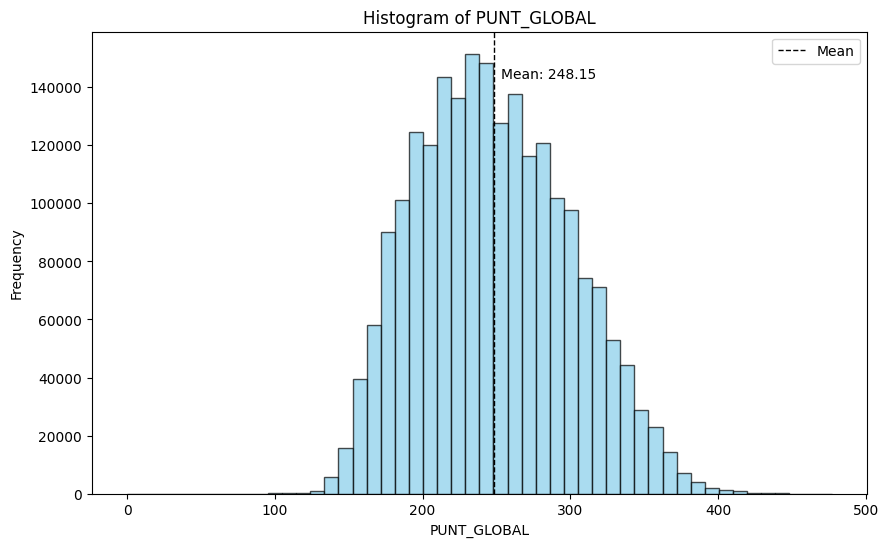

count    2.162248e+06
mean     2.481474e+02
std      5.163404e+01
min      0.000000e+00
25%      2.080000e+02
50%      2.450000e+02
75%      2.850000e+02
max      4.770000e+02
Name: PUNT_GLOBAL, dtype: float64
Skewness: 0.27
Kurtosis: -0.50


In [14]:
plt.figure(figsize=(10, 6))
plt.hist(d_icfes['PUNT_GLOBAL'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of PUNT_GLOBAL')
plt.xlabel('PUNT_GLOBAL')
plt.ylabel('Frequency')

mean_value=d_icfes['PUNT_GLOBAL'].mean()
plt.axvline(mean_value, color='black', linestyle='dashed', linewidth=1)
plt.legend({'Mean':mean_value})

plt.text(mean_value+5,plt.ylim()[1]*0.9,'Mean: {:.2f}'.format(mean_value))

plt.show()
descriptive_stats = d_icfes['PUNT_GLOBAL'].describe()
print(descriptive_stats)
skewness_value = skew(d_icfes['PUNT_GLOBAL'])
kurtosis_value = kurtosis(d_icfes['PUNT_GLOBAL'])
print(f'Skewness: {skewness_value:.2f}')
print(f'Kurtosis: {kurtosis_value:.2f}')

Vemos que la media es un poco mayor que la mediana, por lo que la distribución está sesgada un poco sesgada a la derecha, los resultados estan un poco hacia el lado bajo de la distribución.
Por eso tenemos el skewness positivo. 


Además, la curtosis es negativa, lo que indica que la distribución es platicúrtica.
Esto es que tiene unas colas mas concentradas en la media que una variable normal.

Para la educación del pais es preocupante ver estos resultados, ya que podemos comenzar a ver la razon de algunos puntajes con respecto a otro, lo que vamos a evaluar es el estrato socioeconomico de las personas que influye en la calidad de los profesores, educación y al final su resultado en las pruebas saber.

In [15]:
d_icfes['FAMI_EDUCACIONMADRE'].value_counts()

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      561302
Secundaria (Bachillerato) incompleta    293132
Primaria incompleta                     286396
Educación profesional completa          233898
Técnica o tecnológica completa          210946
Primaria completa                       191476
No Aplica                               127370
Técnica o tecnológica incompleta         68022
Educación profesional incompleta         55294
Ninguno                                  46118
Postgrado                                44410
No sabe                                  43884
Name: count, dtype: int64

## Gráfica de estudios Alcanzados por los parientes del estudiante.

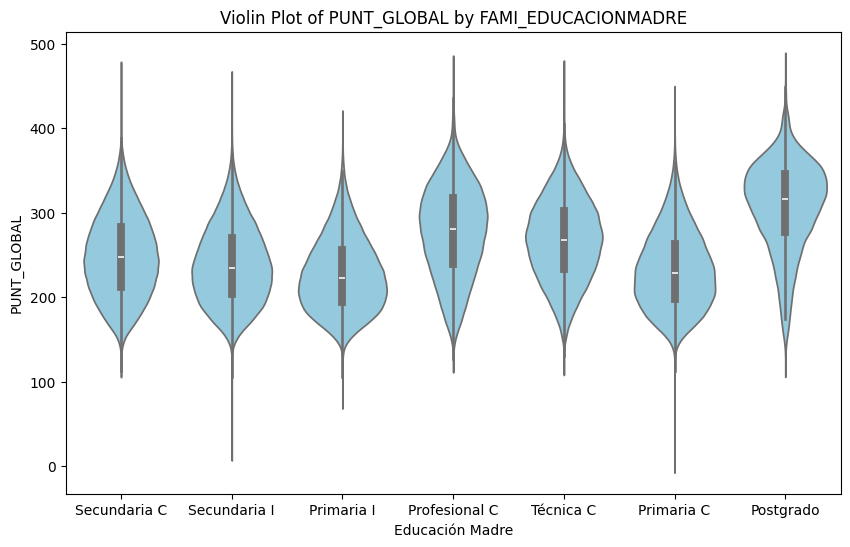

In [16]:


#Limpiemos un poco los strings de la columna

#REplace in FAMI_EDUCACIONMADRE the category 'Secundaria (Bachillerato) completa' to 'Secundaria completa'

d_icfes['FAMI_EDUCACIONMADRE'].replace('Secundaria (Bachillerato) completa','Secundaria C',inplace=True)
d_icfes['FAMI_EDUCACIONMADRE'].replace('Secundaria (Bachillerato) incompleta','Secundaria I',inplace=True)
d_icfes['FAMI_EDUCACIONMADRE'].replace('Primaria incompleta','Primaria I',inplace=True)
d_icfes['FAMI_EDUCACIONMADRE'].replace('Primaria completa','Primaria C',inplace=True)
d_icfes['FAMI_EDUCACIONMADRE'].replace('Educación profesional completa','Profesional C',inplace=True)
d_icfes['FAMI_EDUCACIONMADRE'].replace('Técnica o tecnológica completa','Técnica C',inplace=True)


#Quitamos caracteres para poder interpretar los datos mejor.
d_icfes['FAMI_EDUCACIONPADRE'].replace('Secundaria (Bachillerato) completa','Secundaria C',inplace=True)
d_icfes['FAMI_EDUCACIONPADRE'].replace('Secundaria (Bachillerato) incompleta','Secundaria I',inplace=True)
d_icfes['FAMI_EDUCACIONPADRE'].replace('Primaria incompleta','Primaria I',inplace=True)
d_icfes['FAMI_EDUCACIONPADRE'].replace('Primaria completa','Primaria C',inplace=True)
d_icfes['FAMI_EDUCACIONPADRE'].replace('Educación profesional completa','Profesional C',inplace=True)
d_icfes['FAMI_EDUCACIONPADRE'].replace('Técnica o tecnológica completa','Técnica C',inplace=True)




#selecto only a sepecific category in FAMI_EDUCACIONMADRE for the plot
d_icfes_education_mother=d_icfes[(d_icfes['FAMI_EDUCACIONMADRE']=='Secundaria C') | (d_icfes['FAMI_EDUCACIONMADRE']=='Secundaria I') | (d_icfes['FAMI_EDUCACIONMADRE']=='Primaria I') | (d_icfes['FAMI_EDUCACIONMADRE']=='Primaria C') | (d_icfes['FAMI_EDUCACIONMADRE']=='Profesional C') | (d_icfes['FAMI_EDUCACIONMADRE']=='Técnica C') | (d_icfes['FAMI_EDUCACIONMADRE']=='Postgrado') ]

plt.figure(figsize=(10, 6))
sns.violinplot(x='FAMI_EDUCACIONMADRE', y='PUNT_GLOBAL', data=d_icfes_education_mother, color='skyblue', order=d_icfes_education_mother['FAMI_EDUCACIONMADRE'].value_counts().iloc[:7].index)
plt.title('Violin Plot of PUNT_GLOBAL by FAMI_EDUCACIONMADRE')
plt.xlabel('Educación Madre')
plt.ylabel('PUNT_GLOBAL')
plt.show()




En está gráfica vemos algo interesante, mi hipostesis es que las personas que tienen algun pariente que tenga un nivel de estudios más alto, influye en la economía de el nivel en donde viven este tipo de personas, un alto nivel alcanzado en estudios hace que exista una mayor probabiliad de tener más recursos que alguien que no tiene, y aqui vemos como la gráfica de la mama con postgrado hace que el puntaje sea significativamnete mas alto que los demas, y es más alto a menor educación, si vemos la primaria incompleta, vemos el valor más bajo en los puntajes icfes, ya que esto influye directamente en la calidad de le educación que la persona recibio.

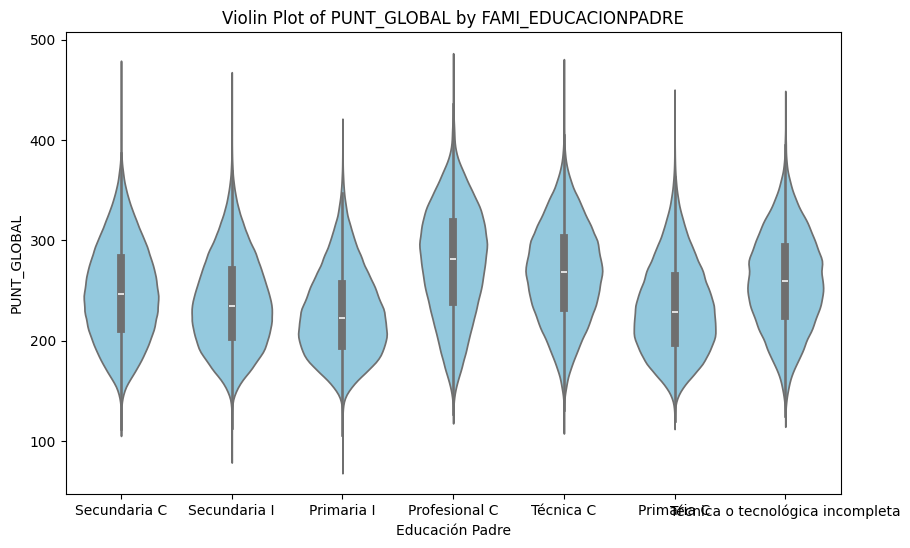

In [17]:
d_icfes_education_father=d_icfes[(d_icfes['FAMI_EDUCACIONPADRE']=='Secundaria C') | (d_icfes['FAMI_EDUCACIONPADRE']=='Secundaria I') | (d_icfes['FAMI_EDUCACIONPADRE']=='Primaria I') | (d_icfes['FAMI_EDUCACIONPADRE']=='Primaria C') | (d_icfes['FAMI_EDUCACIONPADRE']=='Profesional C') | (d_icfes['FAMI_EDUCACIONPADRE']=='Técnica C') | (d_icfes['FAMI_EDUCACIONPADRE']=='Postgrado') ]

plt.figure(figsize=(10, 6))
sns.violinplot(x='FAMI_EDUCACIONMADRE', y='PUNT_GLOBAL', data=d_icfes_education_father, color='skyblue', order=d_icfes_education_father['FAMI_EDUCACIONMADRE'].value_counts().iloc[:7].index)
plt.title('Violin Plot of PUNT_GLOBAL by FAMI_EDUCACIONPADRE')
plt.xlabel('Educación Padre')
plt.ylabel('PUNT_GLOBAL')
plt.show()


Aqui vemos el mismo patron que antes pero sin tanta diferencia entre los profesionales hombres que completaron su profesión. Si comparamos el paddre que termino Primaria incompleta con secundaria completa vemos que la media de secundaria es más alta que la de primaria, igualmente con Profesional, y también vemos la distribución de Postgrado con un nivel más concentrado en la media que tecnica y profesional, haciendo que corresponda al valor de Puntaje más alto

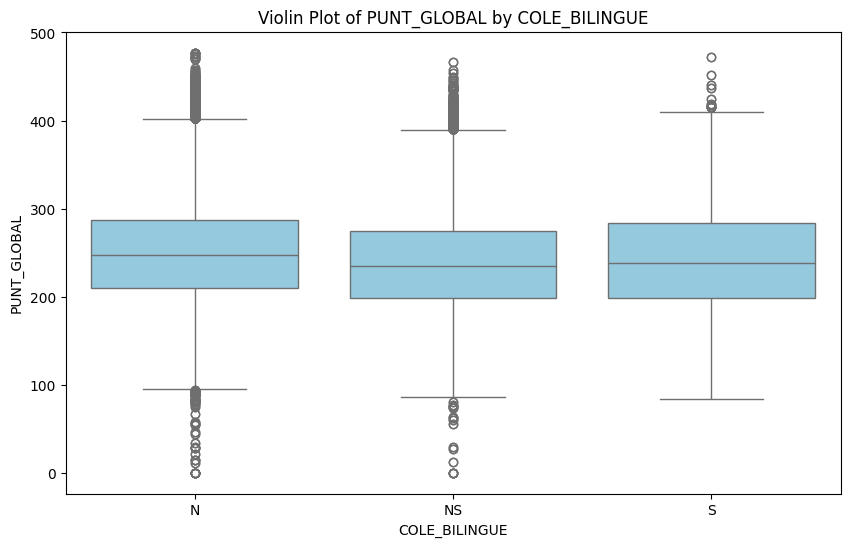

In [18]:
#do a violin of PUNT_GLOBAL by COLE_BILINGUE
plt.figure(figsize=(10, 6))
sns.boxplot(x='COLE_BILINGUE', y='PUNT_GLOBAL', data=d_icfes, color='skyblue')
plt.title('Violin Plot of PUNT_GLOBAL by COLE_BILINGUE')
plt.xlabel('COLE_BILINGUE')
plt.ylabel('PUNT_GLOBAL')
plt.show()


Vemos la gráfica de Colegio Bilingue, y vemos que no hay mucha diferencia, Porque existirria un hipotesis que un colegio bilingue puede atraer a padres con más nivel socioeconomico, y por lo tanto influir en el puntaje Global, sin embargo en está gráfica vemos que no es asi. Para nuestro siguiente análisis vamos a ver que efecto tiene esta variable en la regresión lineal.

In [19]:
d_icfes.value_counts('ESTU_DEPTO_RESIDE')

ESTU_DEPTO_RESIDE
BOGOTÁ             321184
ANTIOQUIA          293982
VALLE              158696
CUNDINAMARCA       141080
ATLANTICO          126470
BOLIVAR            104636
SANTANDER          100064
CORDOBA             84832
MAGDALENA           67074
NARIÑO              66800
TOLIMA              64568
NORTE SANTANDER     64458
BOYACA              63962
CAUCA               55416
HUILA               54794
CESAR               53560
META                48242
SUCRE               44342
CALDAS              40940
RISARALDA           40744
LA GUAJIRA          37290
QUINDIO             24044
CASANARE            23102
CHOCO               19476
CAQUETA             17156
PUTUMAYO            15838
ARAUCA              13510
GUAVIARE             4078
AMAZONAS             3314
SAN ANDRES           2442
VICHADA              2230
VAUPES               1580
GUAINIA              1318
NS                    756
EXTRANJERO            270
Name: count, dtype: int64

## Vamos a hacer un Mapa Interactivo por Departamento

In [20]:


import pandas as pd
#import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo # para exportar en html
     


import json
from urllib.request import urlopen
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    counties = json.load(response)
     

#Create a dataframe with the PUNTAJE_GLOBAL AND ESTU_DEPTO_RESIDE
d_icfes_dept=d_icfes[['PUNT_GLOBAL','ESTU_DEPTO_RESIDE']]


#chhange the name of a categorr ESTU_DEPTO_RESIDE called 'Bogoá D.C' to 'Bogotá'

d_icfes['ESTU_DEPTO_RESIDE'].replace('BOGOTÁ','SANTAFE DE BOGOTA D.C',inplace=True)
d_icfes['ESTU_DEPTO_RESIDE'].replace('VALLE','VALLE DEL CAUCA',inplace=True)




locs = d_icfes_dept['ESTU_DEPTO_RESIDE']

for loc in counties['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']


mean_values = d_icfes_dept.groupby('ESTU_DEPTO_RESIDE')['PUNT_GLOBAL'].mean().reset_index()

fig = go.Figure(go.Choroplethmapbox(
    geojson=counties,
    locations=mean_values['ESTU_DEPTO_RESIDE'],
    z=mean_values['PUNT_GLOBAL'],
    colorscale='Viridis',
    colorbar_title="Número",
))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3.4,
    mapbox_center={"lat": 4.570868, "lon": -74.2973328},
)

fig.show()




ModuleNotFoundError: No module named 'plotly'

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\David\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\David\AppData\Local\Temp\ipykernel_15240\1513646619.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



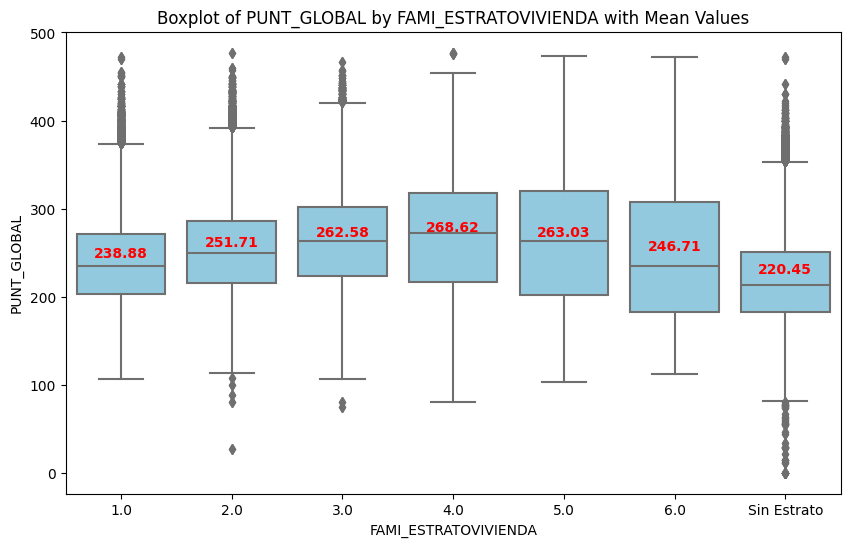

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=d_icfes, color='skyblue',)
# Annotate means on the plot
means = d_icfes.groupby('FAMI_ESTRATOVIVIENDA')['PUNT_GLOBAL'].mean().round(2)
for i, mean in enumerate(means):
    plt.text(i, mean + 2, str(mean), ha='center', va='bottom', fontweight='bold', color='red')

plt.title('Boxplot of PUNT_GLOBAL by FAMI_ESTRATOVIVIENDA with Mean Values')
plt.xlabel('FAMI_ESTRATOVIVIENDA')
plt.ylabel('PUNT_GLOBAL')
plt.show()



Desde mi perspectiva, encuentro realmente interesante la relación que parece existir entre el estrato de vivienda y los resultados en las pruebas ICFES. Creo que, en efecto, existe una correlación, pero hasta cierto punto. El estrato de una persona puede proporcionarnos información sobre su situación socioeconómica, y esto a su vez puede ser un reflejo de diversos factores que influyen en su rendimiento académico.

Uno de los factores clave es el acceso a recursos de calidad, como alimentos nutritivos, colegios bien equipados y, lo que es fundamental, profesores altamente calificados. Las personas con mejores recursos pueden optar por colegios donde los docentes están mejor preparados y, en general, reciben una educación de mayor calidad. Esto se traduce en mejores resultados en las pruebas del ICFES.

Además, considero que el tiempo disponible para el estudio es un elemento crucial. En estratos más altos, es más probable que los jóvenes no tengan que trabajar para contribuir económicamente al hogar, lo que les permite dedicar más tiempo al estudio. En contraste, en estratos más bajos, a menudo, la necesidad económica obliga a los jóvenes a trabajar, lo que puede limitar su capacidad para dedicar tiempo suficiente al aprendizaje.

No obstante, existe un punto interesante que subrayas: llega un momento en el que el dinero ya no es una ventaja determinante. Esto se evidencia en estratos 5 y 6, donde los jóvenes, independientemente del estrato, pueden acceder a una educación de calidad. En estos casos, el acceso a recursos adicionales, como clases particulares con los mejores profesores o la matriculación en colegios de élite, se convierte en una posibilidad para todos.

Aquí creamos un mapa que representa el promedio de los resultados del ICFES mediante colores, donde el amarillo indica el valor más alto y los tonos morados indican valores más bajos. Se observa que las ciudades principales tienen un promedio más alto que los municipios menos desarrollados. Notablemente, Chocó, Amazonas y Vaupés presentan los valores más bajos.

Chocó se destaca como uno de los departamentos con el mayor porcentaje de Necesidades Básicas Insatisfechas (NBI), alcanzando aproximadamente el 79.19% de su población, en comparación con el 27.78% de la media nacional según estadísticas del 2017 del Dane. Este departamento enfrenta desafíos significativos, como la escasez de agua potable y necesidades básicas insatisfechas. En particular, en áreas concentradas de Chocó, se evidencian problemas de desnutrición infantil.

La falta de acceso a agua potable y las difíciles condiciones económicas en estos departamentos hacen que sea considerablemente más difícil para la población estudiar o recibir una educación de calidad. La situación económica precaria dificulta la concentración en la educación y limita las oportunidades para mejorar la calidad de vida.

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\David\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



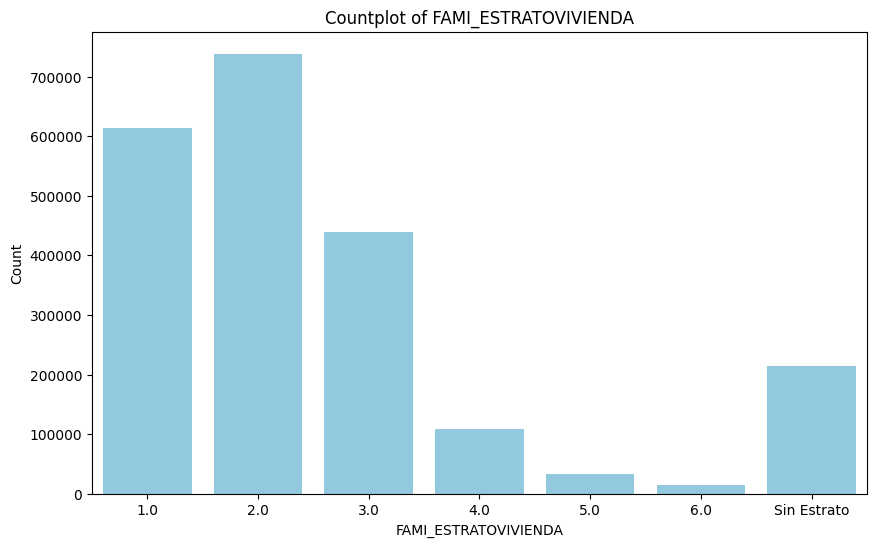

FAMI_ESTRATOVIVIENDA
2.0            0.341508
1.0            0.283872
3.0            0.202957
Sin Estrato    0.099457
4.0            0.049917
5.0            0.015252
6.0            0.007037
Name: proportion, dtype: float64


In [ ]:
#plot FAMI_ESTRATOVIVIENDA count per category
plt.figure(figsize=(10, 6))
sns.countplot(x='FAMI_ESTRATOVIVIENDA', data=d_icfes, color='skyblue')
#anotate porcentages
plt.title('Countplot of FAMI_ESTRATOVIVIENDA')
plt.xlabel('FAMI_ESTRATOVIVIENDA')
plt.ylabel('Count')
plt.show()

#print the porcentages of each category in the total data
print(d_icfes['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True))




Vemos como esta distribuido el capital en colombia, vemos como los estratos 1,2,3 ocupan aproximadamente el 90 porciento de los datos, esto nos muestra el problema tan grande de desigualdad que tiene colombia. Y la falta de oportunades que sigue viendo en la diferencia a educación.


c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\David\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



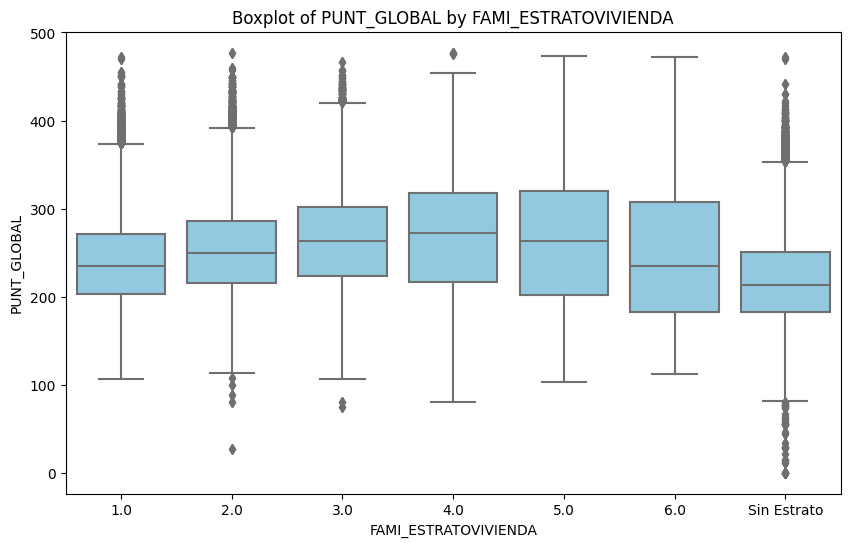

In [ ]:
#plot boxplot of PUNT_GLOBAL by FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=d_icfes, color='skyblue')
plt.title('Boxplot of PUNT_GLOBAL by FAMI_ESTRATOVIVIENDA')
plt.xlabel('FAMI_ESTRATOVIVIENDA')
plt.ylabel('PUNT_GLOBAL')
plt.show()


esde mi perspectiva, encuentro realmente interesante la relación que parece existir entre el estrato de vivienda y los resultados en las pruebas ICFES. Creo que, en efecto, existe una correlación, pero hasta cierto punto. El estrato de una persona puede proporcionarnos información sobre su situación socioeconómica, y esto a su vez puede ser un reflejo de diversos factores que influyen en su rendimiento académico.

Uno de los factores clave es el acceso a recursos de calidad, como alimentos nutritivos, colegios bien equipados y, lo que es fundamental, profesores altamente calificados. Las personas con mejores recursos pueden optar por colegios donde los docentes están mejor preparados y, en general, reciben una educación de mayor calidad. Esto se traduce en mejores resultados en las pruebas del ICFES.

Además, considero que el tiempo disponible para el estudio es un elemento crucial. En estratos más altos, es más probable que los jóvenes no tengan que trabajar para contribuir económicamente al hogar, lo que les permite dedicar más tiempo al estudio. En contraste, en estratos más bajos, a menudo, la necesidad económica obliga a los jóvenes a trabajar, lo que puede limitar su capacidad para dedicar tiempo suficiente al aprendizaje.

No obstante, existe un punto interesante: llega un momento en el que el dinero ya no es una ventaja determinante. Esto se evidencia en estratos 5 y 6, donde los jóvenes, independientemente del estrato, pueden acceder a una educación de calidad. En estos casos, el acceso a recursos adicionales, como clases particulares con los mejores profesores o la matriculación en colegios de élite, se convierte en una posibilidad para todos.

## Fase 3: explorar identificación de estudiantes destacados según mútiples criterios

En esta fase, pondrás a prueba tus habilidades en filtrado mediante condiciones lógicas para explorar a la población objetivo según diferentes características. Imagina diferentes posibilidades de asignar becas, filtrando a los estudiantes según su pertenencia a diversos grupos socio-demográficos (e.g., edad, estrato, género) y su desempeño académico (en total, o según puntajes o percentiles de corte en diferentes áreas). Como ejercicio inicial, selecciona estudiantes de colegios públicos por fuera de Bogotá que hayan obtenido desempeño global superior al percentil 95, y estén arriba de la media nacional en cada una de las áreas individuales. Ordena estos estudiantes, tanto en función de su puntaje global como de su nivel socio-económico, y en función de ello, selecciona 20 candidatos a becas. Compara las características de ambos grupos.

In [ ]:
# Implementa tu respuesta en esta celda


## Fase 4: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

# Regresión Lineal


Los datos en nuestro dataset son muy grandes, y por eso vamos a tomar aproximadamente 100.000 datos aleatorios

In [21]:
#take 1000 samples of the data randomly
import statsmodels.api as sm

d_icfes_modelo=d_icfes.sample(n=100000, random_state=1)
categorical_values_regresion = ['COLE_BILINGUE', 'ESTU_DEPTO_RESIDE', 'ESTU_GENERO', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA']
value_predict_regresion=['PUNT_GLOBAL']


d_icfes_modelo=d_icfes_modelo[categorical_values_regresion+value_predict_regresion]

#convert categorical values to one hot encoding
d_icfes_modelo=pd.get_dummies(d_icfes_modelo, columns=categorical_values_regresion, drop_first=True)

y = d_icfes_modelo['PUNT_GLOBAL']
X = d_icfes_modelo.drop('PUNT_GLOBAL', axis=1)
X=X.astype('int')


X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     436.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:12:00   Log-Likelihood:            -5.2277e+05
No. Observations:              100000   AIC:                         1.046e+06
Df Residuals:                   99927   BIC:                         1.046e+06
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Vemos que nuestro modelo no explica muy bien la variabilidad de los datos, vemos que el r2 tiene un puntaje de 0.23 lo que hace que el modelo no se ajuste bien sin embargo, vamos a hacer las pruebas de hipotesis del análisis de los residuos

## Análisis de los residuos

Al evaluar los supuestos de la regresión lineal, observamos en el qq plot que nuestros residuos se asemejan a una distribución normal, lo cual cumple con uno de los requisitos para la regresión lineal. Sin embargo, identificamos un problema de heterocedasticidad, donde los errores no mantienen una varianza constante a lo largo del tiempo, mostrando una variabilidad no constante.

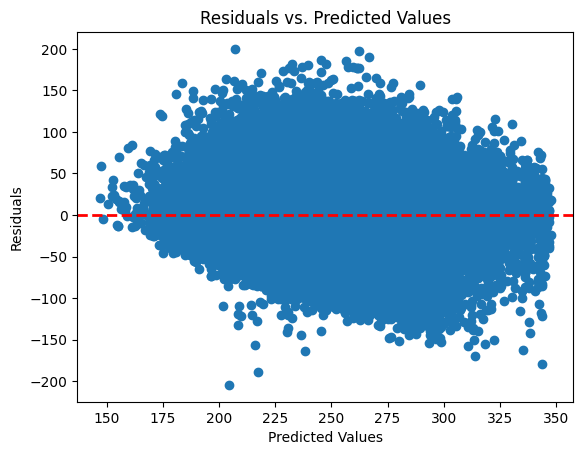

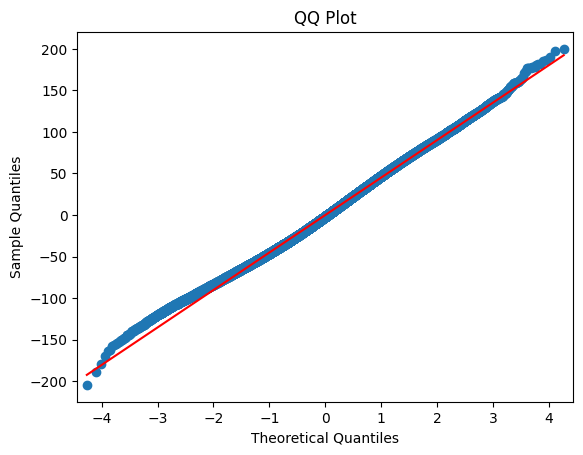

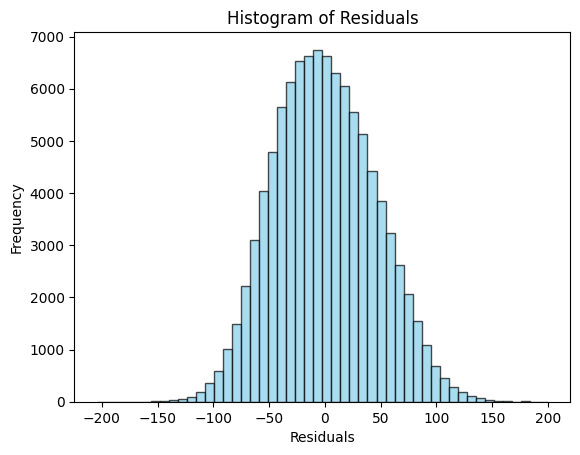

Shapiro-Wilk test: p-value = 0.0000


In [185]:
residuals=result.resid
predicted_values=result.fittedvalues


plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


#plot qqplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s')
plt.title('QQ Plot')
plt.show()

#graph the residuals
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#do kosmovororo test
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)

# Print the p-value of the test
print(f'Shapiro-Wilk test: p-value = {shapiro_test[1]:.4f}')




## Logistic Regresion

c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\David\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Accuracy: 0.64055
Confusion Matrix:
[[    0     2     1     0     0]
 [    0   565  3464    25     0]
 [    0   443 11655   354     0]
 [    0    29  2845   591     0]
 [    0     0    13    13     0]]
Classification Report:
              precision    recall  f1-score   support

       0-100       0.00      0.00      0.00         3
     100-200       0.54      0.14      0.22      4054
     200-300       0.65      0.94      0.77     12452
     300-400       0.60      0.17      0.27      3465
     400-500       0.00      0.00      0.00        26

    accuracy                           0.64     20000
   macro avg       0.36      0.25      0.25     20000
weighted avg       0.62      0.64      0.57     20000



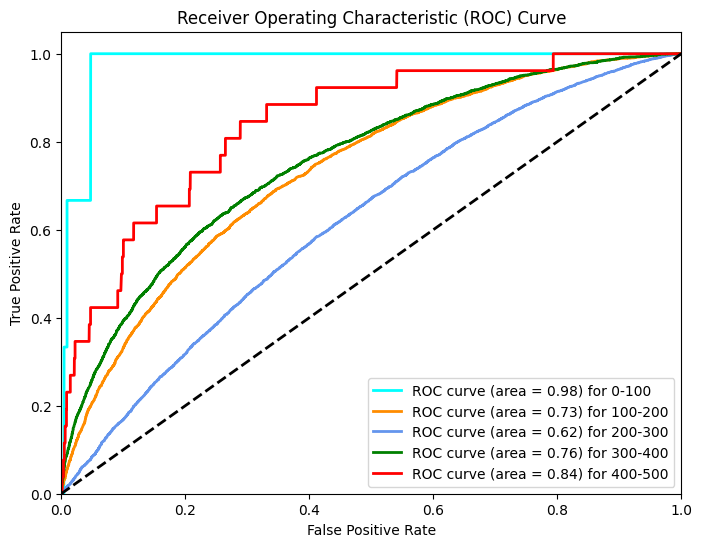

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
from itertools import cycle  # Add this import



bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500']
d_icfes_modelo['PUNT_GLOBAL_CATEGORY'] = pd.cut(d_icfes_modelo['PUNT_GLOBAL'], bins=bins, labels=labels, include_lowest=True)


y=d_icfes_modelo['PUNT_GLOBAL_CATEGORY']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)




# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, label in enumerate(labels):
    y_bin = (y_test == label).astype(int)
    y_score = logistic_model.predict_proba(X_test)[:, i]
    fpr[label], tpr[label], _ = roc_curve(y_bin, y_score)
    roc_auc[label] = roc_auc_score(y_bin, y_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

for label, color in zip(labels, colors):
    plt.plot(fpr[label], tpr[label], color=color, lw=2,
             label=f'ROC curve (area = {roc_auc[label]:.2f}) for {label}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Observamos que nuestro modelo acierta en la clasificación del 64% de los datos, indicando un error del 46%. Se destaca una buena clasificación en los puntajes de 200 a 300, donde se encuentra la media del modelo. Sin embargo, el modelo presenta dificultades al clasificar ciertos rangos, como se evidencia en la matriz de confusión:

css

[[    0     2     1     0     0]
 [    0   565  3464    25     0]
 [    0   443 11655   354     0]
 [    0    29  2845   591     0]
 [    0     0    13    13     0]]

En esta matriz, se observa que hay una baja probabilidad de acierto en la clasificación de ciertos datos, lo cual es importante considerar para mejorar el rendimiento del modelo. Aunque clasifica de manera efectiva los grupos 0 y 5, que representan puntajes de 0 a 100 y de 400 a 500, respectivamente, en las demás categorías parece tener un rendimiento similar al de lanzar una moneda (probabilidad de 0.5). Para la curva Roc vemos que solo nos importa los valores de 100 a 200,200-300,300-400 el cual el modelo tiene un rendimineto bastante grande. de 0.76 para persondas de 300 a 400. 

## Random Tree algorithm

In [119]:
from sklearn.ensemble import RandomForestClassifier

# ... (assuming you've already defined 'X' and 'd_icfes_modelo')

bins = [0, 100, 200, 300, 400, 500]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500']
d_icfes_modelo['PUNT_GLOBAL_CATEGORY'] = pd.cut(d_icfes_modelo['PUNT_GLOBAL'], bins=bins, labels=labels, include_lowest=True)

y = d_icfes_modelo['PUNT_GLOBAL_CATEGORY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


c:\Users\David\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.59905
Confusion Matrix:
[[    0     1     2     0     0]
 [    0   927  2945   181     1]
 [    0  1219 10190  1039     4]
 [    0   159  2444   862     0]
 [    0     1    10    13     2]]
Classification Report:
              precision    recall  f1-score   support

       0-100       0.00      0.00      0.00         3
     100-200       0.40      0.23      0.29      4054
     200-300       0.65      0.82      0.73     12452
     300-400       0.41      0.25      0.31      3465
     400-500       0.29      0.08      0.12        26

    accuracy                           0.60     20000
   macro avg       0.35      0.27      0.29     20000
weighted avg       0.56      0.60      0.57     20000



c:\Users\David\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\David\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Vemos que nuestro modelo de regresión logistica tuvo los mejores resultados utilizando estos dos modelos 

## Fase 5: generar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

In [ ]:
# Implementa tu respuesta en esta celda}


## (Desarrollo opcional)

De manera opcional, puedes implementar tu desarrollo usando `PySpark` para aprovechar ventajas como el procesamiento distribuido y escalabilidad.

Pautas generales:

* Cargar en una base de datos relacional (tipo SQL) el segmento de los datos sobre el cual profundizaste en tu análisis, utilizando una tabla distinta para cada categoría de campos. Por ejemplo, una categoría puede ser información del colegio; en cuyo caso, una tabla debería contener un registro único para cada colegio y todos los campos asociados.

* Los campos, a excepción de los identificadores, deben existir en una única tabla.

* Cada registro debe existir una única vez en su respectiva tabla.

* Cada registro debe tener un identificador único en su tabla, el cual establece una relación entre tablas.

* Seleccionar uno de los modelos predictivos implementados.

* Crear en la base de datos relacional una tabla que contenga únicamente los identificadores del registro y la predicción de la variable de respuesta hecha por el modelo.

* Desarrollar _queries_ de SQL según las siguientes indicaciones y concluir acerca de los resultados:
    * Un _query_ que seleccione todos registros y los agregue en una única tabla. Para esto debes relacionar las tablas por su identificador, utilizando el método `JOIN`.
    * Un _query_ que contenga el puntaje promedio de los estudiantes, agrupado por año y por colegio.
    * Distintos _queries_ que calculen medidas de error de predicción del modelo a partir de los datos reales y las predicciones respectivas. Debes reportar el error para cada registro, el error total de los registros de entrenamiento y el error total de los registros de prueba.
    * Haz dos _queries_ adicionales que resulten interesantes.

## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 01/08/2023